# -----------------------------------------__E__xtract-----------------------------------------

In [1]:
# Dependencies
import requests
import pandas as pd 
import datetime
from sqlalchemy import create_engine

In [2]:
# Source 1: we picked our first data source of covid 19 daily data from the following API
# Source 1: Calling the API
url = "https://api.covid19api.com/all"
response1 = requests.get(url).json()
response1

country = []
date = []
total_cases = []
total_deaths = []
total_recovered = []

for row in response1:
    country.append(row['Country'])
    date.append(row["Date"])
    total_cases.append(row['Confirmed'])
    total_deaths.append(row['Deaths'])
    total_recovered.append(row['Recovered'])

    #creating the dataframe
covid_df = pd.DataFrame({
                            'Country': country,
                            'Date': date,
                            'TotalCases': total_cases,
                            'TotalDeaths': total_deaths,
                            'TotalRecovered': total_recovered
})
covid_df.head()

,Country,Date,TotalCases,TotalDeaths,TotalRecovered
0,Afghanistan,2020-01-22T00:00:00Z,0,0,0
1,Afghanistan,2020-01-23T00:00:00Z,0,0,0
2,Afghanistan,2020-01-24T00:00:00Z,0,0,0
3,Afghanistan,2020-01-25T00:00:00Z,0,0,0
4,Afghanistan,2020-01-26T00:00:00Z,0,0,0


In [3]:
## we pulled the contingency plans from OXFORD COVID-19 Government Response Tracker(OxCGRT) 
## the website https://data.humdata.org/dataset/oxford-covid-19-government-response-tracker

# Source 2: read from csv file
government_df=pd.read_csv('Resources/government_contingency.csv')
government_df

C:\Users\dlefo\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,#country,#country+code,#date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44211,Pitcairn Islands,PCN,20200822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.11,NaN,14.29,NaN,NaN,NaN,NaN,NaN,NaN
44212,Pitcairn Islands,PCN,20200823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.11,NaN,14.29,NaN,NaN,NaN,NaN,NaN,NaN
44213,Pitcairn Islands,PCN,20200824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.11,NaN,14.29,NaN,NaN,NaN,NaN,NaN,NaN
44214,Pitcairn Islands,PCN,20200825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.11,NaN,14.29,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# The COVID19 Government Measures Dataset puts together all the measures implemented by governments worldwide in response to the Coronavirus pandemic. Data collection includes secondary data review. The researched information available falls into five categories:
# Social distancing
# Movement restrictions
# Public health measures
# Social and economic measures
# Lockdowns
# Each category is broken down into several types of measures.
# ACAPS consulted government, media, United Nations, and other organisations sources.
# For any comments, please contact us at info@acaps.org
# Please note note that some measures together with non-compliance policies may not be recorded and the exact date of implementation may not be accurate in some cases, due to the different way of reporting of the primary data sources we used.

In [5]:
# Source3: read from excel file
xlFile = pd.ExcelFile(r'Resources/acaps_covid19_government_measures_dataset.xlsx')
special_measures_df = pd.read_excel(xlFile, sheet_name='Database')
special_measures_df

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,2020-02-12 00:00:00,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,No,NaN,NaN,2020-02-12 00:00:00,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
2,3,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,NaN,NaN,2020-02-12 00:00:00,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
3,4,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,2020-02-12 00:00:00,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
4,5,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,2020-03-12 00:00:00,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,2020-03-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,13722,Zimbabwe,ZWE,NaN,NaN,Africa,Introduction / extension of measures,Movement restrictions,Surveillance and monitoring,No,Everyone transiting through Zimbabwe should ha...,Not available,2020-06-09 00:00:00,Ministry of Information,Social media,https://twitter.com/MinOfInfoZW/status/1270378...,2020-06-13,NaN
16796,13723,Zimbabwe,ZWE,NaN,NaN,Africa,Phase-out measure,Social distancing,Schools closure,No,the re-opening of schools be moved from the pr...,Not applicable,2020-07-28 00:00:00,Ministry of Information,Social media,https://twitter.com/MinOfInfoZW/status/1270378...,2020-06-13,NaN
16797,13724,Zimbabwe,ZWE,NaN,NaN,Africa,Introduction / extension of measures,Movement restrictions,Surveillance and monitoring,Yes,Identification/travel documents of returness w...,Not available,2020-06-09 00:00:00,Ministry of Information,Social media,https://twitter.com/MinOfInfoZW/status/1270378...,2020-06-13,NaN
16798,14734,Zimbabwe,ZWE,NaN,NaN,Africa,Phase-out measure,Social distancing,Closure of businesses and public services,Yes,Restaurants now allowed to serve sit-in meals ...,Not applicable,2020-06-30 00:00:00,Ministry of Information,Social media,https://twitter.com/MinOfInfoZW/status/1278043...,2020-07-03,NaN


# -----------------------------------------__T__ransform-----------------------------------------

In [6]:
# Source1: changing the date format
covid_df.loc[:,'Date']=pd.to_datetime(covid_df.loc[:,"Date"]).apply(lambda x: x.date())
covid_df['Date']=covid_df['Date'].apply(lambda x: pd.to_datetime(str(x)))
covid_df.head()
# Source1: discovering the uncleanness
covid_df.shape
# # the shape shows that the data is not consistent so there must be redundancies
days=len(covid_df['Date'].value_counts())
days
date_percountry=covid_df['Country'].value_counts()
date_percountry
 
# # deleting the multiple rows for the same date
countries=covid_df['Country'].unique()
for c in countries:
    if date_percountry[c]>days:
        country_df=covid_df.loc[(covid_df["Country"]==c)]
        max_df=country_df.groupby('Date').max().reset_index()
        new_df=covid_df.loc[(covid_df["Country"]!=c)]
        frames=[new_df,max_df]
        new_covid_df = pd.concat(frames)
clean_covid_df=new_covid_df.copy()

clean_covid_df
clean_covid_df.shape
#there are still some duplicate data
clean_covid_df['Date'].value_counts()
# there are more than 186 (number of countries) dates where all so we must delete the duplicate dates for the same country
clean_covid_df=clean_covid_df.drop_duplicates(subset=['Date','Country'])
#now the shape shows that the data is totally clean
# so we will write this to a csv to save time
clean_covid_df.to_csv('Resources/covid_from_API.CSV')
clean_covid_df

,Country,Date,TotalCases,TotalDeaths,TotalRecovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
217,United States of America,2020-08-26,5821819,179708,2084465
218,United States of America,2020-08-27,5867785,180824,2101326
219,United States of America,2020-08-28,5913941,181800,2118367
220,United States of America,2020-08-29,5961094,182761,2140614


In [7]:
#Source 2:
# delete the first row
clean_government_df= government_df.loc[government_df['CountryName']!='#country']
# determine the date data type
government_df['Date'].dtype
# converting the date format from object to date
clean_government_df['Date']=clean_government_df['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))


C:\Users\dlefo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [8]:
# renaming the columns
clean_government_df.columns=['CountryName','CountryCode','Date','C1_School_closing','C1_Flag','C2_Workplace_closing','C2_Flag','C3_Cancel_public_events','C3_Flag','C4_Restrictions_on_gatherings','C4_Flag','C5_Close_public_transport','C5_Flag','C6_Stay_at_home_requirements','C6_Flag','C7_Restrictions_on_internal_movement','C7_Flag','C8_International_travel_controls','E1_Income_support','E1_Flag','E2_Debt_contract_relief','E3_Fiscal_measures','E4_International_support','H1_Public_information_campaigns','H1_Flag','H2_Testing_policy','H3_Contact_tracing','H4_Emergency_investment_in_healthcare','H5_Investment_in_vaccines','M1_Wildcard','ConfirmedCases','ConfirmedDeaths','StringencyIndex','StringencyIndexForDisplay','StringencyLegacyIndex','StringencyLegacyIndexForDisplay','GovernmentResponseIndex','GovernmentResponseIndexForDisplay','ContainmentHealthIndex','ContainmentHealthIndexForDisplay','EconomicSupportIndex','EconomicSupportIndexForDisplay']

In [9]:
clean_government_df.head()

,CountryName,CountryCode,Date,C1_School_closing,C1_Flag,C2_Workplace_closing,C2_Flag,C3_Cancel_public_events,C3_Flag,C4_Restrictions_on_gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
1,Aruba,ABW,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Aruba,ABW,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# picking 24 columns out of 42
clean_government_df=clean_government_df[['CountryName',
'Date',
'C1_School_closing',
'C2_Workplace_closing',
'C3_Cancel_public_events',
'C4_Restrictions_on_gatherings',
'C5_Close_public_transport',
'C6_Stay_at_home_requirements',
'C7_Restrictions_on_internal_movement',
'C8_International_travel_controls',
'E1_Income_support',
'E2_Debt_contract_relief',
'E3_Fiscal_measures',
'E4_International_support',
'H1_Public_information_campaigns',
'H2_Testing_policy',
'H3_Contact_tracing',
'H4_Emergency_investment_in_healthcare',
'H5_Investment_in_vaccines',
'StringencyIndex',
'StringencyLegacyIndex',
'GovernmentResponseIndex',
'ContainmentHealthIndex',
'EconomicSupportIndex'
]]


In [11]:
clean_government_df

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C3_Cancel_public_events,C4_Restrictions_on_gatherings,C5_Close_public_transport,C6_Stay_at_home_requirements,C7_Restrictions_on_internal_movement,C8_International_travel_controls,...,H1_Public_information_campaigns,H2_Testing_policy,H3_Contact_tracing,H4_Emergency_investment_in_healthcare,H5_Investment_in_vaccines,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex
1,Aruba,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Aruba,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44211,Pitcairn Islands,2020-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44212,Pitcairn Islands,2020-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44213,Pitcairn Islands,2020-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44214,Pitcairn Islands,2020-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#dropping the nan values to get rid of the unfilled data which is mostly the last week 
clean_government_df=clean_government_df.dropna()


In [13]:
clean_government_df=clean_government_df.drop_duplicates(subset=['CountryName','Date'])

In [14]:
clean_government_df

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C3_Cancel_public_events,C4_Restrictions_on_gatherings,C5_Close_public_transport,C6_Stay_at_home_requirements,C7_Restrictions_on_internal_movement,C8_International_travel_controls,...,H1_Public_information_campaigns,H2_Testing_policy,H3_Contact_tracing,H4_Emergency_investment_in_healthcare,H5_Investment_in_vaccines,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex
1,Aruba,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0
2,Aruba,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0
3,Aruba,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0
4,Aruba,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0
5,Aruba,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43239,Kosovo,2020-08-06,2.0,2.0,2.0,4.0,1.0,2.0,2.0,1.0,...,2.0,1.0,1.0,0.0,0.0,69.44,70.24,64.1,64.39,62.5
43240,Kosovo,2020-08-07,2.0,2.0,2.0,4.0,1.0,2.0,2.0,1.0,...,2.0,1.0,1.0,0.0,0.0,69.44,70.24,64.1,64.39,62.5
43241,Kosovo,2020-08-08,2.0,2.0,2.0,4.0,1.0,2.0,2.0,1.0,...,2.0,1.0,1.0,0.0,0.0,69.44,70.24,64.1,64.39,62.5
43242,Kosovo,2020-08-09,2.0,2.0,2.0,4.0,1.0,2.0,2.0,1.0,...,2.0,1.0,1.0,0.0,0.0,69.44,70.24,64.1,64.39,62.5


In [15]:
clean_government_df['CountryName'].value_counts()

Bhutan                      239
Cameroon                    239
Czech Republic              239
Cyprus                      239
Netherlands                 239
                           ... 
Tajikistan                  219
Djibouti                    219
Ethiopia                    216
Cuba                        211
Turks and Caicos Islands      3
Name: CountryName, Length: 178, dtype: int64

## __Source 3__
### -columns selection based on data completeness and analysis potential
### -changed date format to match source 1
### -checked COUNTRY counts

In [16]:
# Source 3: Choosing useful columns
clean_special_measures_df=special_measures_df[['COUNTRY','DATE_IMPLEMENTED','REGION','LOG_TYPE','CATEGORY','MEASURE','TARGETED_POP_GROUP','COMMENTS','SOURCE','SOURCE_TYPE','LINK']]

In [17]:
clean_special_measures_df

,COUNTRY,DATE_IMPLEMENTED,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,SOURCE,SOURCE_TYPE,LINK
0,Afghanistan,2020-02-12 00:00:00,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,No,NaN,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...
1,Afghanistan,2020-02-12 00:00:00,Asia,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,No,NaN,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...
2,Afghanistan,2020-02-12 00:00:00,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,NaN,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...
3,Afghanistan,2020-02-12 00:00:00,Asia,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...
4,Afghanistan,2020-03-12 00:00:00,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...
...,...,...,...,...,...,...,...,...,...,...,...
16795,Zimbabwe,2020-06-09 00:00:00,Africa,Introduction / extension of measures,Movement restrictions,Surveillance and monitoring,No,Everyone transiting through Zimbabwe should ha...,Ministry of Information,Social media,https://twitter.com/MinOfInfoZW/status/1270378...
16796,Zimbabwe,2020-07-28 00:00:00,Africa,Phase-out measure,Social distancing,Schools closure,No,the re-opening of schools be moved from the pr...,Ministry of Information,Social media,https://twitter.com/MinOfInfoZW/status/1270378...
16797,Zimbabwe,2020-06-09 00:00:00,Africa,Introduction / extension of measures,Movement restrictions,Surveillance and monitoring,Yes,Identification/travel documents of returness w...,Ministry of Information,Social media,https://twitter.com/MinOfInfoZW/status/1270378...
16798,Zimbabwe,2020-06-30 00:00:00,Africa,Phase-out measure,Social distancing,Closure of businesses and public services,Yes,Restaurants now allowed to serve sit-in meals ...,Ministry of Information,Social media,https://twitter.com/MinOfInfoZW/status/1278043...


In [18]:
# Source 3: changing the date format
clean_special_measures_df.loc[:,'DATE_IMPLEMENTED']=pd.to_datetime(clean_special_measures_df.loc[:,"DATE_IMPLEMENTED"]).apply(lambda x: x.date())
clean_special_measures_df['DATE_IMPLEMENTED']=clean_special_measures_df['DATE_IMPLEMENTED'].apply(lambda x: pd.to_datetime(str(x)))
clean_special_measures_df.head()

C:\Users\dlefo\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\dlefo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,COUNTRY,DATE_IMPLEMENTED,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,SOURCE,SOURCE_TYPE,LINK
0,Afghanistan,2020-02-12,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,No,NaN,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...
1,Afghanistan,2020-02-12,Asia,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,No,NaN,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...
2,Afghanistan,2020-02-12,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,NaN,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...
3,Afghanistan,2020-02-12,Asia,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...
4,Afghanistan,2020-03-12,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...


In [19]:
clean_special_measures_df['COUNTRY'].value_counts()

Philippines                 395
Australia                   329
United States of America    300
Sri Lanka                   295
Malaysia                    271
                           ... 
Kiribati                     17
Moldova Republic of          16
Tuvalu                       15
Burundi                      14
Korea DPR                    13
Name: COUNTRY, Length: 194, dtype: int64

## __Ensure source 2 and 3 foreign key values exist in source 1 primary keys__

__Note:__ The table covid_statistics was deemed to hold the primary statistical results for analysis. A cleaning method was required to eliminate Country's and Date's that did not exist within the covid_statistics dataframe. The use of Left JOINS between government_measures_stringency and government_measures_keydate, independently, with the covid_statistics dataframe achieved the desired result. The independent dataframes will allow flexibility for the Data Analyst to perform various operations.

### Merge and clean source 1 to source 2 droping all source 1 columns and null values in foreign key columns in source 2.

In [20]:
merge1_2=pd.merge(clean_covid_df, clean_government_df, left_on=['Country','Date'],right_on=['CountryName','Date'], how='left')
merge1_2=merge1_2.drop(columns=['Country','TotalCases','TotalDeaths','TotalRecovered'])
merge1_2=merge1_2[merge1_2['CountryName'].notna()]
merge1_2=merge1_2[merge1_2['Date'].notna()]
merge1_2.head()

,Date,CountryName,C1_School_closing,C2_Workplace_closing,C3_Cancel_public_events,C4_Restrictions_on_gatherings,C5_Close_public_transport,C6_Stay_at_home_requirements,C7_Restrictions_on_internal_movement,C8_International_travel_controls,...,H1_Public_information_campaigns,H2_Testing_policy,H3_Contact_tracing,H4_Emergency_investment_in_healthcare,H5_Investment_in_vaccines,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex
0,2020-01-22,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Merge and clean source 1 to source 3 droping all source 1 columns and null values in foreign key columns in source 3.

In [21]:
merge1_3=pd.merge(clean_covid_df, clean_special_measures_df, left_on=['Country','Date'],right_on=['COUNTRY','DATE_IMPLEMENTED'], how='left')
merge1_3=merge1_3.drop(columns=['Country','Date','TotalCases','TotalDeaths','TotalRecovered'])
merge1_3=merge1_3.dropna()
merge1_3.head()

,COUNTRY,DATE_IMPLEMENTED,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,SOURCE,SOURCE_TYPE,LINK
2,Afghanistan,2020-01-24,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,MoPH begins announcements on their facebook to...,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1005130...
4,Afghanistan,2020-01-26,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,Yes,Health teams at airports will check passengers...,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1006458...
5,Afghanistan,2020-01-27,Asia,Introduction / extension of measures,Movement restrictions,International flights suspension,Yes,Flights to China are suspended.,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...
6,Afghanistan,2020-01-27,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,No,Health screenings of all passengers at airports.,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...
11,Afghanistan,2020-02-01,Asia,Introduction / extension of measures,Movement restrictions,Border checks,Yes,All China and Iran nationals,US Embassy,Government,https://af.usembassy.gov/covid-19-information/


# -----------------------------------------__L__oad-----------------------------------------

### Choosing Postgresql as database
#### -Postgresql was chosen due to the nature of the data being related by country and date. This relationship supports the structure of relational databases.

## __Creating a ERD diagram__

### ERD Postgresql Code

In [ ]:
# Exported from QuickDBD: https://www.quickdatabasediagrams.com/

# CREATE TABLE "covid_statistics" (
#     "Country" VARCHAR   NOT NULL,
#     "Date" DATE   NOT NULL,
#     "TotalCases" INT   NOT NULL,
#     "TotalDeaths" INT   NOT NULL,
#     "TotalRecovered" INT   NOT NULL,
#     CONSTRAINT "pk_covid_statistics" PRIMARY KEY (
#         "Country","Date"
#      )
# );

# CREATE TABLE "government_measures_stringency" (
#     "CountryName" VARCHAR   NOT NULL,
#     "Date" DATE   NOT NULL,
#     "C1_School_closing" BIGINT   NULL,
#     "C2_Workplace_closing" BIGINT   NULL,
#     "C3_Cancel_public_events" BIGINT   NULL,
#     "C4_Restrictions_on_gatherings" BIGINT   NULL,
#     "C5_Close_public_transport" BIGINT   NULL,
#     "C6_Stay_at_home_requirements" BIGINT   NULL,
#     "C7_Restrictions_on_internal_movement" BIGINT   NULL,
#     "C8_International_travel_controls" BIGINT   NULL,
#     "E1_Income_support" BIGINT   NULL,
#     "E2_Debt_contract_relief" BIGINT   NULL,
#     "E3_Fiscal_measures" BIGINT   NULL,
#     "E4_International_support" BIGINT   NULL,
#     "H1_Public_information_campaigns" BIGINT   NULL,
#     "H2_Testing_policy" BIGINT   NULL,
#     "H3_Contact_tracing" BIGINT   NULL,
#     "H4_Emergency_investment_in_healthcare" BIGINT   NULL,
#     "H5_Investment_in_vaccines" BIGINT   NULL,
#     "StringencyIndex" BIGINT   NULL,
#     "StringencyLegacyIndex" BIGINT   NULL,
#     "GovernmentResponseIndex" BIGINT   NULL,
#     "ContainmentHealthIndex" BIGINT   NULL,
#     "EconomicSupportIndex" BIGINT   NULL
# );

# CREATE TABLE "government_measures_keydate" (
#     "id" SERIAL   NOT NULL,
#     "COUNTRY" VARCHAR   NOT NULL,
#     "DATE_IMPLEMENTED" DATE   NOT NULL,
#     "REGION" VARCHAR   NULL,
#     "LOG_TYPE" VARCHAR   NULL,
#     "CATEGORY" VARCHAR   NULL,
#     "MEASURE" VARCHAR   NULL,
#     "TARGETED_POP_GROUP" VARCHAR   NULL,
#     "COMMENTS" VARCHAR   NULL,
#     "SOURCE" VARCHAR   NULL,
#     "SOURCE_TYPE" VARCHAR   NULL,
#     "LINK" VARCHAR   NULL
# );

# ALTER TABLE "government_measures_stringency" ADD CONSTRAINT "fk_government_measures_stringency_CountryName_Date" FOREIGN KEY("CountryName", "Date")
# REFERENCES "covid_statistics" ("Country", "Date");

# ALTER TABLE "government_measures_keydate" ADD CONSTRAINT "fk_government_measures_keydate_COUNTRY_DATE_IMPLEMENTED" FOREIGN KEY("COUNTRY", "DATE_IMPLEMENTED")
# REFERENCES "covid_statistics" ("Country", "Date");

### ERD Image
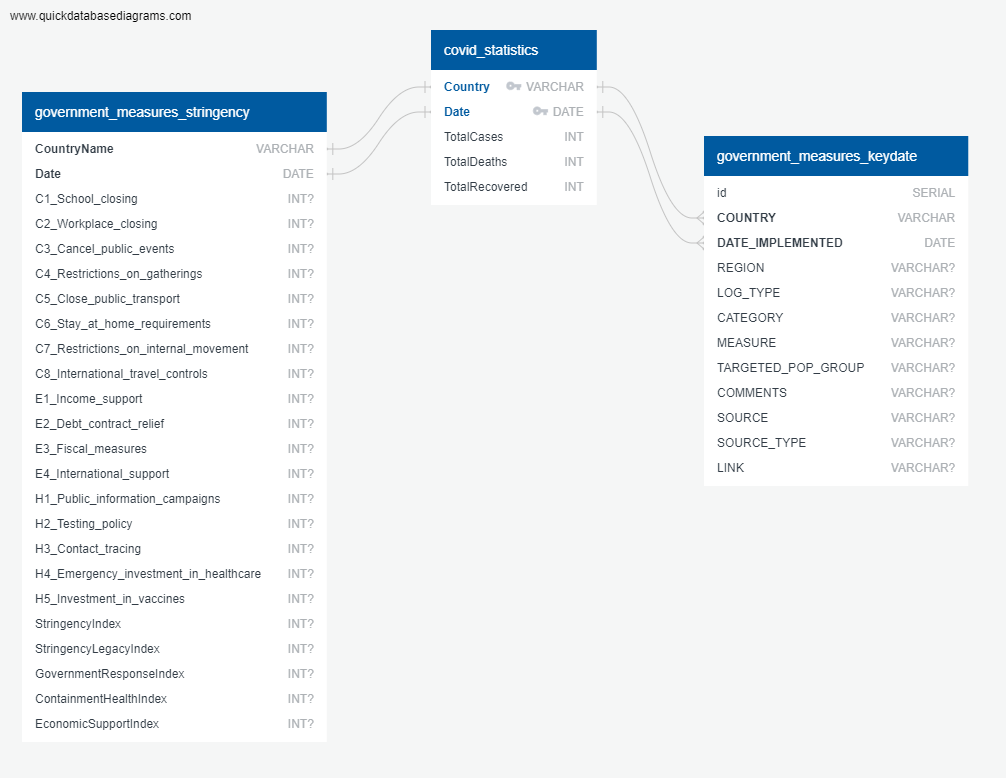

## __Connect to local database__

In [37]:
import ETLconfig
from ETLconfig import rds_connection_string

In [38]:
engine = create_engine(f'postgresql+psycopg2://{rds_connection_string}')

## __Check for tables__

In [39]:
engine.table_names()

['covid_statistics',
 'government_measures_keydate',
 'government_measures_stringency']

## __Use pandas to load dataframe(s) into database__

In [40]:
clean_covid_df.to_sql(name='covid_statistics', con=engine, if_exists='append',index=False)

In [41]:
merge1_2.to_sql(name='government_measures_stringency', con=engine, if_exists='append',index=False)

In [42]:
merge1_3.to_sql(name='government_measures_keydate', con=engine, if_exists='append',index=False)